- Data Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers 

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [2]:
path = '/Users/chiaotingtsai/Desktop/Wholesale customers data.csv'
df = pd.read_csv(path)
categories = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
R1 = df.loc[df.Region==1,:][categories]
R2 = df.loc[df.Region==2,:][categories]
R3 = df.loc[df.Region==3,:][categories]
dict = {'Region':['A','B','Other'],'Fresh' : [round(R1['Fresh'].sum()/R1.sum().sum(),2),round(R2['Fresh'].sum()/R2.sum().sum(),2),round(R3['Fresh'].sum()/R3.sum().sum(),2)],
        'Milk':[round(R1['Milk'].sum()/R1.sum().sum(),2),round(R2['Milk'].sum()/R2.sum().sum(),2),round(R3['Milk'].sum()/R3.sum().sum(),2)],
        'Grocery':[round(R1['Grocery'].sum()/R1.sum().sum(),2),round(R2['Grocery'].sum()/R2.sum().sum(),2),round(R3['Grocery'].sum()/R3.sum().sum(),2)],
        'Frozen':[round(R1['Frozen'].sum()/R1.sum().sum(),2),round(R2['Frozen'].sum()/R2.sum().sum(),2),round(R3['Frozen'].sum()/R3.sum().sum(),2)],
        'Detergents_Paper':[round(R1['Detergents_Paper'].sum()/R1.sum().sum(),2),round(R2['Detergents_Paper'].sum()/R2.sum().sum(),2),round(R3['Detergents_Paper'].sum()/R3.sum().sum(),2)],
        'Delicassen':[round(R1['Delicassen'].sum()/R1.sum().sum(),2),round(R2['Delicassen'].sum()/R2.sum().sum(),2),round(R3['Delicassen'].sum()/R3.sum().sum(),2)]
       }
df1 = pd.DataFrame.from_dict(dict,orient='index').T
df1

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,A,0.36,0.18,0.24,0.1,0.09,0.04
1,B,0.3,0.15,0.28,0.12,0.11,0.04
2,Other,0.37,0.18,0.23,0.09,0.08,0.05


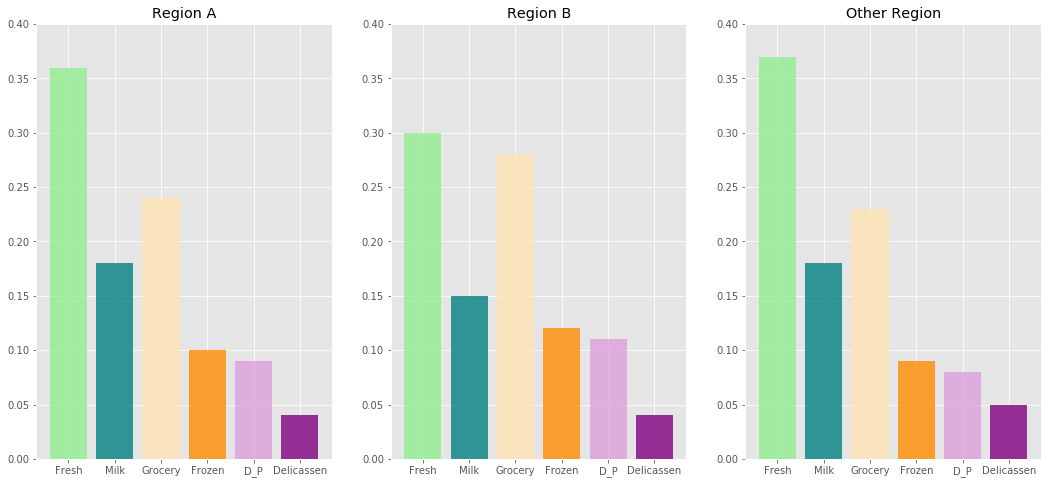

In [5]:
plt.style.use('ggplot')
color=['lightgreen', 'teal', 'moccasin', 'darkorange', 'plum','purple']
fig = plt.figure(figsize = (18,8))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

langs = ['Fresh','Milk','Grocery','Frozen','D_P','Delicassen']
ax1.bar(langs,df1.iloc[0,1:],color=color,alpha=0.8);
ax2.bar(langs,df1.iloc[1,1:],color=color,alpha=0.8);
ax3.bar(langs,df1.iloc[2,1:],color=color,alpha=0.8);
ax1.set_ylim([0,0.4])
ax2.set_ylim([0,0.4])
ax3.set_ylim([0,0.4])
ax1.set_title('Region A')
ax2.set_title('Region B')
ax3.set_title('Other Region')
plt.show()

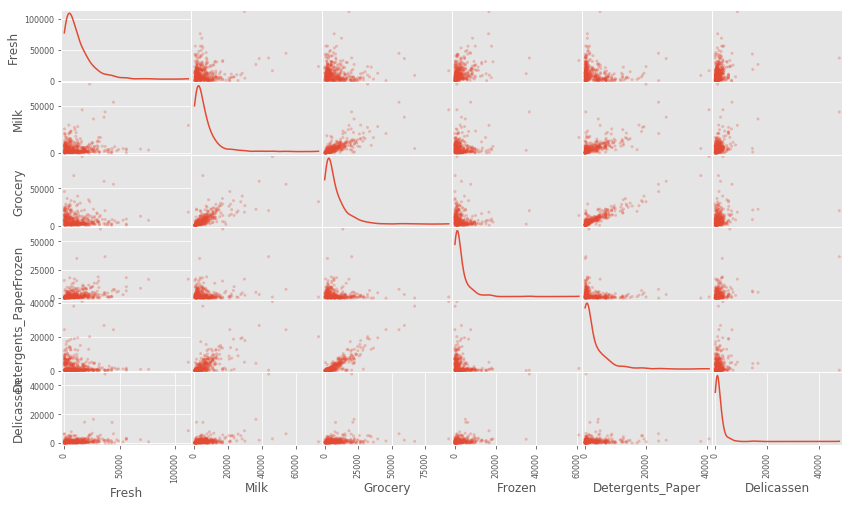

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[categories], alpha = 0.3, figsize = (14,8), diagonal = 'density');
# Produce a scatter matrix for each pair of features in the data

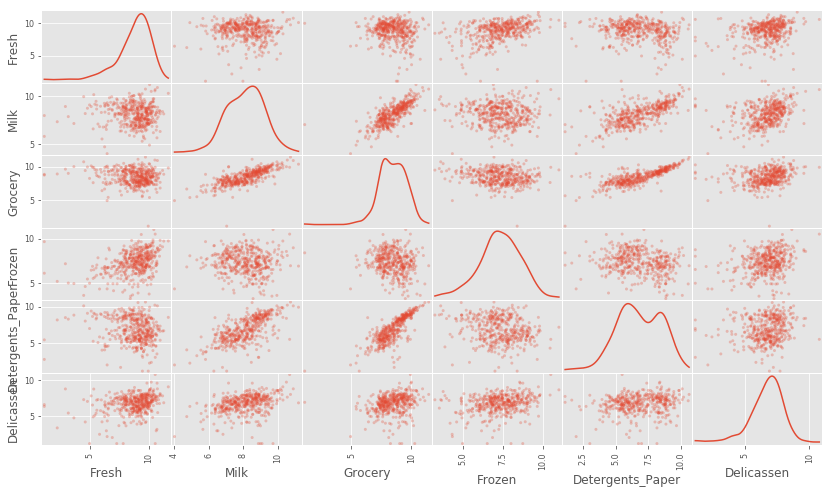

In [7]:
scatter_matrix(np.log(df[categories]), alpha = 0.3, figsize = (14,8), diagonal = 'density');

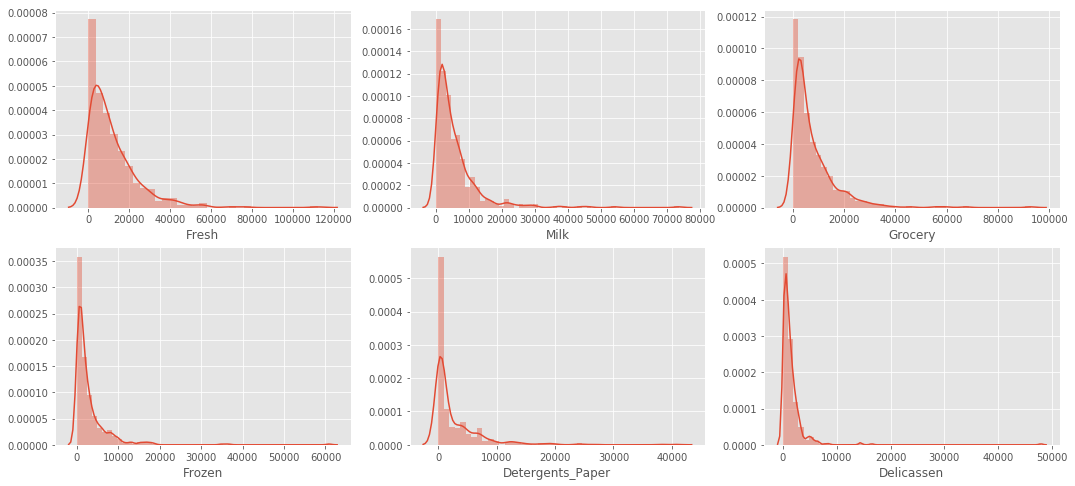

In [8]:
f=plt.figure(figsize = (18,8))
f.add_subplot(2,3,1)
sns.distplot(df.Fresh);
f.add_subplot(2,3,2)
sns.distplot(df.Milk);
f.add_subplot(2,3,3)
sns.distplot(df.Grocery);
f.add_subplot(2,3,4)
sns.distplot(df.Frozen);
f.add_subplot(2,3,5)
sns.distplot(df.Detergents_Paper);
f.add_subplot(2,3,6)
sns.distplot(df.Delicassen);

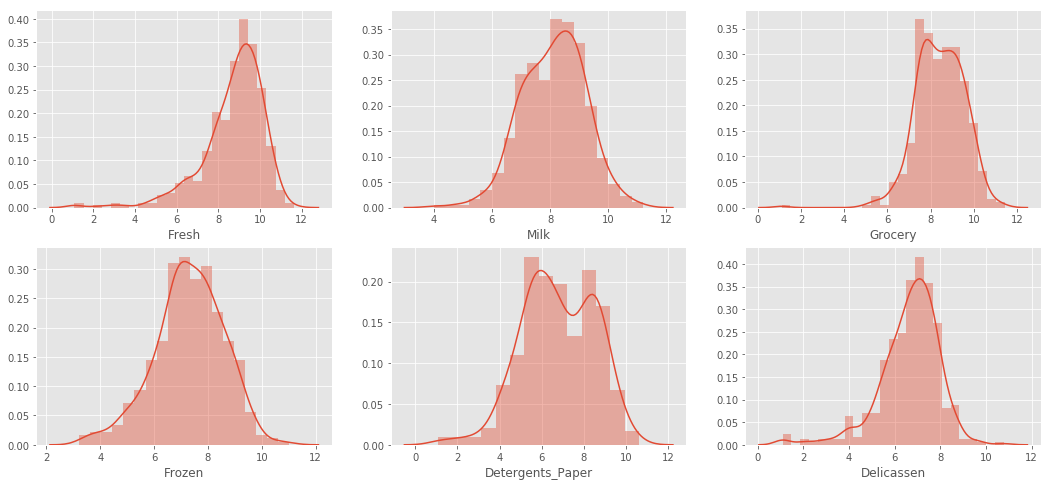

In [9]:
f=plt.figure(figsize = (18,8))
f.add_subplot(2,3,1)
sns.distplot(np.log(df.Fresh));
f.add_subplot(2,3,2)
sns.distplot(np.log(df.Milk));
f.add_subplot(2,3,3)
sns.distplot(np.log(df.Grocery));
f.add_subplot(2,3,4)
sns.distplot(np.log(df.Frozen));
f.add_subplot(2,3,5)
sns.distplot(np.log(df.Detergents_Paper));
f.add_subplot(2,3,6)
sns.distplot(np.log(df.Delicassen));

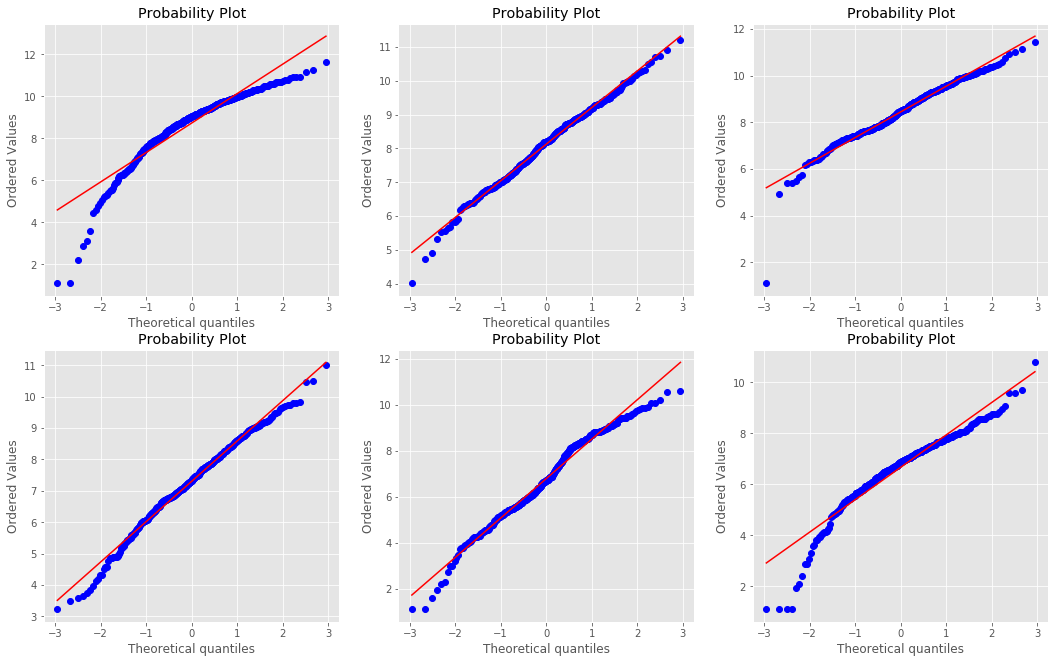

In [10]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (18,11))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

stats.probplot(np.log(df.Fresh), dist="norm", plot=ax1);
stats.probplot(np.log(df.Milk), dist="norm", plot=ax2);
stats.probplot(np.log(df.Grocery), dist="norm", plot=ax3);
stats.probplot(np.log(df.Frozen), dist="norm", plot=ax4);
stats.probplot(np.log(df.Detergents_Paper), dist="norm", plot=ax5);
stats.probplot(np.log(df.Delicassen), dist="norm", plot=ax6);
plt.show();

In [11]:
R1 = df.loc[df.Region==1,:]
R2 = df.loc[df.Region==2,:]
R3 = df.loc[df.Region==3,:]
R1_1 = R1.loc[R1.Channel==1,:][categories]
R1_2 = R1.loc[R1.Channel==2,:][categories]
R2_1 = R2.loc[R2.Channel==1,:][categories]
R2_2 = R2.loc[R2.Channel==2,:][categories]
R3_1 = R3.loc[R3.Channel==1,:][categories]
R3_2 = R3.loc[R3.Channel==2,:][categories]
dict = {'Region':['A城市','A城市','B城市','B城市','其他城市','其他城市'],'Channel':['餐飲業','零售業','餐飲業','零售業','餐飲業','零售業'],
        'Count':[len(R1_1),len(R1_2),len(R2_1),len(R2_2),len(R3_1),len(R3_2)],
        'Precent':['{:.2%}'.format(round(len(R1_1)/(len(R1_1)+len(R1_2)),4)),
                   '{:.2%}'.format(round(len(R1_2)/(len(R1_1)+len(R1_2)),4)),
                   '{:.2%}'.format(round(len(R2_1)/(len(R2_1)+len(R2_2)),4)),
                   '{:.2%}'.format(round(len(R2_2)/(len(R2_1)+len(R2_2)),4)),
                   '{:.2%}'.format(round(len(R3_1)/(len(R3_1)+len(R3_2)),4)),
                   '{:.2%}'.format(round(len(R3_2)/(len(R3_1)+len(R3_2)),4))]
}
df1 = pd.DataFrame.from_dict(dict,orient='index').T
df1

,Region,Channel,Count,Precent
0,A城市,餐飲業,59,76.62%
1,A城市,零售業,18,23.38%
2,B城市,餐飲業,28,59.57%
3,B城市,零售業,19,40.43%
4,其他城市,餐飲業,211,66.77%
5,其他城市,零售業,105,33.23%


In [115]:
dict = {'Region':['A城市','B城市','其他城市'],
        'Count':[len(R1_1)+len(R1_2),len(R2_1)+len(R2_2),len(R3_1)+len(R3_2)],
        'Precent':['{:.2%}'.format(round((len(R1_1)+len(R1_2))/440,4)),
                   '{:.2%}'.format(round((len(R2_1)+len(R2_2))/440,4)),
                   '{:.2%}'.format(round((len(R3_1)+len(R3_2))/440,4))]
       }
pd.DataFrame.from_dict(dict,orient='index').T

,Region,Count,Precent
0,A城市,77,17.50%
1,B城市,47,10.68%
2,其他城市,316,71.82%


In [12]:
dict = {'Region':['A','A','B','B','Other','Other'],'Channel':['catering','retail','catering','retail','catering','retail'],'Fresh' : [round(R1_1['Fresh'].sum()/R1_1.sum().sum(),2),round(R1_2['Fresh'].sum()/R1_2.sum().sum(),2),round(R2_1['Fresh'].sum()/R2_1.sum().sum(),2),round(R2_2['Fresh'].sum()/R2_2.sum().sum(),2),round(R3_1['Fresh'].sum()/R3_1.sum().sum(),2),round(R3_2['Fresh'].sum()/R3_2.sum().sum(),2)],
        'Milk':[round(R1_1['Milk'].sum()/R1_1.sum().sum(),2),round(R1_2['Milk'].sum()/R1_2.sum().sum(),2),round(R2_1['Milk'].sum()/R2_1.sum().sum(),2),round(R2_2['Milk'].sum()/R2_2.sum().sum(),2),round(R3_1['Milk'].sum()/R3_1.sum().sum(),2),round(R3_2['Milk'].sum()/R3_2.sum().sum(),2)],
        'Grocery':[round(R1_1['Grocery'].sum()/R1_1.sum().sum(),2),round(R1_2['Grocery'].sum()/R1_2.sum().sum(),2),round(R2_1['Grocery'].sum()/R2_1.sum().sum(),2),round(R2_2['Grocery'].sum()/R2_2.sum().sum(),2),round(R3_1['Grocery'].sum()/R3_1.sum().sum(),2),round(R3_2['Grocery'].sum()/R3_2.sum().sum(),2)],
        'Frozen':[round(R1_1['Frozen'].sum()/R1_1.sum().sum(),2),round(R1_2['Frozen'].sum()/R1_2.sum().sum(),2),round(R2_1['Frozen'].sum()/R2_1.sum().sum(),2),round(R2_2['Frozen'].sum()/R2_2.sum().sum(),2),round(R3_1['Frozen'].sum()/R3_1.sum().sum(),2),round(R3_2['Frozen'].sum()/R3_2.sum().sum(),2)],
        'Detergents_Paper':[round(R1_1['Detergents_Paper'].sum()/R1_1.sum().sum(),2),round(R1_2['Detergents_Paper'].sum()/R1_2.sum().sum(),2),round(R2_1['Detergents_Paper'].sum()/R2_1.sum().sum(),2),round(R2_2['Detergents_Paper'].sum()/R2_2.sum().sum(),2),round(R3_1['Detergents_Paper'].sum()/R3_1.sum().sum(),2),round(R3_2['Detergents_Paper'].sum()/R3_2.sum().sum(),2)],
        'Delicassen':[round(R1_1['Delicassen'].sum()/R1_1.sum().sum(),2),round(R1_2['Delicassen'].sum()/R1_2.sum().sum(),2),round(R2_1['Delicassen'].sum()/R2_1.sum().sum(),2),round(R2_2['Delicassen'].sum()/R2_2.sum().sum(),2),round(R3_1['Delicassen'].sum()/R3_1.sum().sum(),2),round(R3_2['Delicassen'].sum()/R3_2.sum().sum(),2)]
       }
df2 = pd.DataFrame.from_dict(dict,orient='index').T
df2

,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,A,catering,0.49,0.15,0.15,0.12,0.04,0.05
1,A,retail,0.11,0.23,0.39,0.05,0.17,0.04
2,B,catering,0.45,0.09,0.17,0.22,0.02,0.04
3,B,retail,0.17,0.21,0.37,0.04,0.19,0.03
4,Other,catering,0.51,0.13,0.14,0.13,0.03,0.06
5,Other,retail,0.21,0.23,0.34,0.03,0.15,0.04


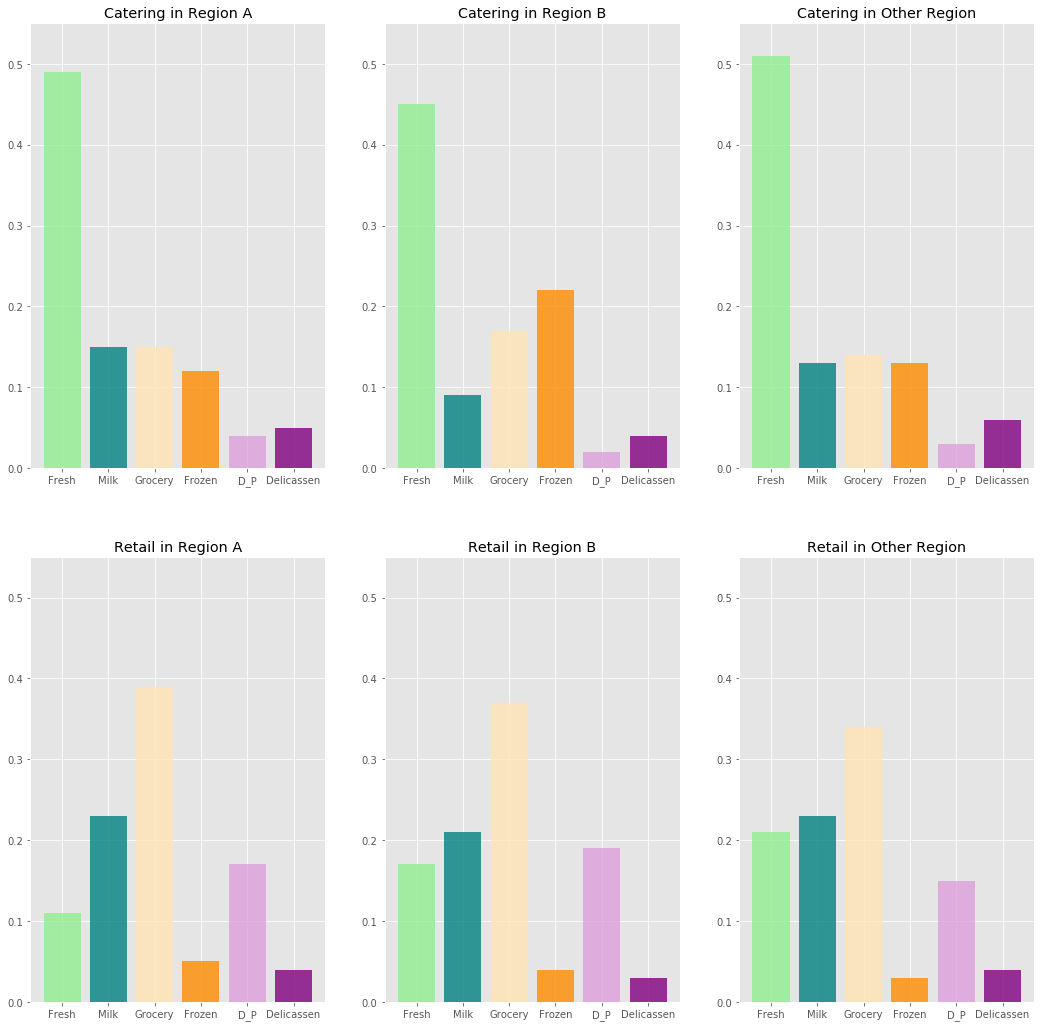

In [13]:
plt.style.use('ggplot')
color=['lightgreen', 'teal', 'moccasin', 'darkorange', 'plum','purple']
fig = plt.figure(figsize = (18,18))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 4)
ax3 = fig.add_subplot(2, 3, 2)
ax4 = fig.add_subplot(2, 3, 5)
ax5 = fig.add_subplot(2, 3, 3)
ax6 = fig.add_subplot(2, 3, 6)

langs = ['Fresh','Milk','Grocery','Frozen','D_P','Delicassen']
ax1.bar(langs,df2.iloc[0][categories],color=color,alpha=0.8);
ax2.bar(langs,df2.iloc[1][categories],color=color,alpha=0.8);
ax3.bar(langs,df2.iloc[2][categories],color=color,alpha=0.8);
ax4.bar(langs,df2.iloc[3][categories],color=color,alpha=0.8);
ax5.bar(langs,df2.iloc[4][categories],color=color,alpha=0.8);
ax6.bar(langs,df2.iloc[5][categories],color=color,alpha=0.8);
ax1.set_ylim([0,0.55])
ax2.set_ylim([0,0.55])
ax3.set_ylim([0,0.55])
ax4.set_ylim([0,0.55])
ax5.set_ylim([0,0.55])
ax6.set_ylim([0,0.55])
ax1.set_title('Catering in Region A')
ax2.set_title('Retail in Region A')
ax3.set_title('Catering in Region B')
ax4.set_title('Retail in Region B')
ax5.set_title('Catering in Other Region')
ax6.set_title('Retail in Other Region')
plt.show()

In [14]:
df_log = df.copy()
df_log[categories] = df[categories].apply(np.log)
df_log.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,2,3,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,2,3,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,1,3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,2,3,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [15]:
for k in categories:
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df_log[k], 25)
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df_log[k], 75)
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    # Display the outliers
    r = (Q1 - step),(Q3 + step)
    print(k,r)
    display(df_log[~((df_log[k] >= Q1 - step) & (df_log[k] <= Q3 + step))].sort_values(by=[k]))

Fresh (5.514550833608026, 12.270571816559475)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
95,1,3,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
338,1,2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
66,1,3,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
218,2,1,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
96,2,3,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
357,2,3,3.610918,7.150701,10.011086,4.919981,8.816853,4.700480
65,2,3,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
412,1,3,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134
353,2,3,4.762174,8.742574,9.961898,5.429346,9.069007,7.013016
128,1,3,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612


Milk (5.016732967223546, 11.198728361406147)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
154,1,3,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
98,1,3,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
356,1,3,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275
86,2,3,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723


Grocery (5.275759987575941, 11.67270989103498)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,1,3,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,1,3,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Frozen (4.260350248162942, 10.525223584187506)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
420,1,3,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
38,2,3,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,2,3,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
57,2,3,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
145,2,3,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
429,1,3,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
175,2,3,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,2,1,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
439,1,3,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244
325,1,2,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128


Detergents_Paper (1.4587426638529726, 12.363699359688528)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,1,3,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,1,3,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Delicassen (3.7695940025105954, 9.7490090809691)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
109,2,3,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,1,3,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,1,3,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
187,1,3,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
233,1,1,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910
154,1,3,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,1,3,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
203,1,1,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
285,1,3,10.602965,6.461468,8.188689,6.948897,6.077642,2.890372
289,1,3,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042


In [16]:
outliers  = [65, 66, 75, 128, 154]
df_new = df_log.drop(df_log.index[outliers]).reset_index(drop = True)

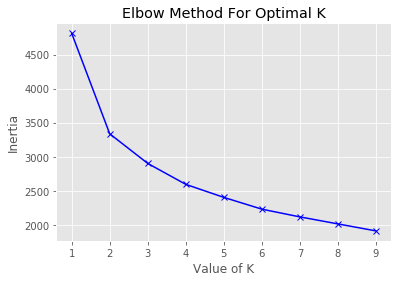

In [20]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_new)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [129]:
X = df_new[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
df_cluster = df_new.copy()
df_cluster['cluster'] = list(labels)
df_cluster.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2
1,2,3,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2
2,2,3,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2
3,1,3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,4
4,2,3,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,4


In [130]:
cluster_0 = df_cluster.loc[df_cluster.cluster==0,:]
cluster_1 = df_cluster.loc[df_cluster.cluster==1,:]
cluster_2 = df_cluster.loc[df_cluster.cluster==2,:]
cluster_3 = df_cluster.loc[df_cluster.cluster==3,:]
cluster_4 = df_cluster.loc[df_cluster.cluster==4,:]
cluster_5 = df_cluster.loc[df_cluster.cluster==5,:]

In [147]:
dict = {
    'cluster':[0,1,2,3,4,5],
    'count':[cluster_0.shape[0],cluster_1.shape[0],cluster_2.shape[0],cluster_3.shape[0],cluster_4.shape[0],cluster_5.shape[0]],
    'prop':['{:.2%}'.format(round(cluster_0.shape[0]/len(df_cluster),4)),'{:.2%}'.format(round(cluster_1.shape[0]/len(df_cluster),4)),'{:.2%}'.format(round(cluster_2.shape[0]/len(df_cluster),4)),'{:.2%}'.format(round(cluster_3.shape[0]/len(df_cluster),4)),'{:.2%}'.format(round(cluster_4.shape[0]/len(df_cluster),4)),'{:.2%}'.format(round(cluster_5.shape[0]/len(df_cluster),4))]
}
c_shape = pd.DataFrame(dict).T
c_shape

,0,1,2,3,4,5
cluster,0,1,2,3,4,5
count,61,41,96,112,86,39
prop,14.02%,9.43%,22.07%,25.75%,19.77%,8.97%


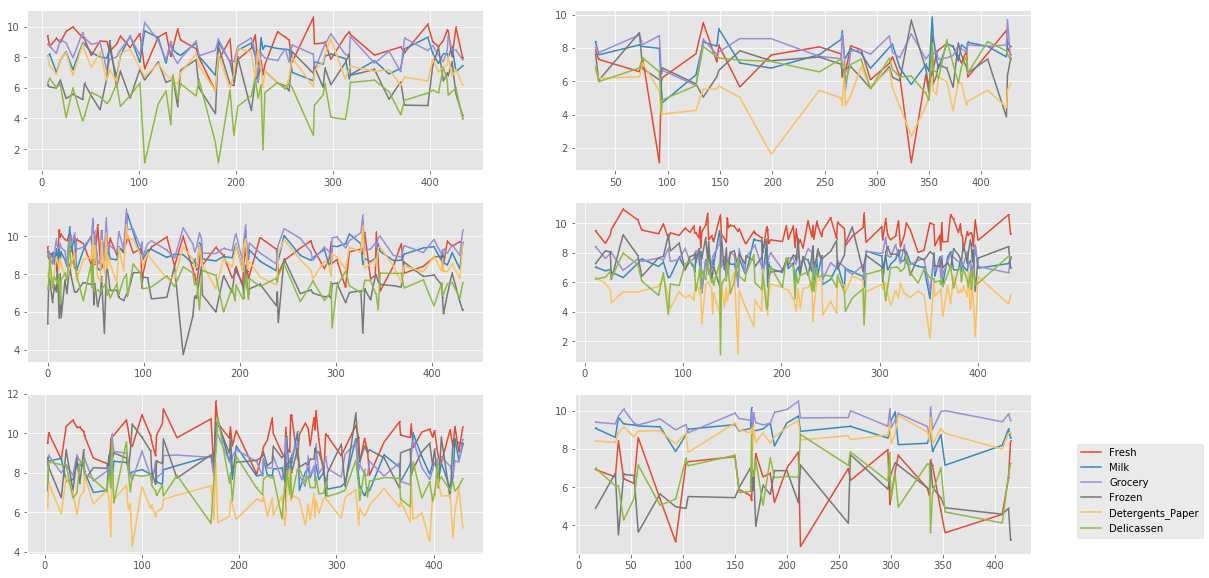

In [155]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig = plt.figure(figsize = (18,10))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

ax1.plot(cluster_0[categories],linestyle='solid', marker=',');
ax2.plot(cluster_1[categories],linestyle='solid', marker=',');
ax3.plot(cluster_2[categories],linestyle='solid', marker=',');
ax4.plot(cluster_3[categories],linestyle='solid', marker=',');
ax5.plot(cluster_4[categories],linestyle='solid', marker=',');
ax6.plot(cluster_5[categories],linestyle='solid', marker=',');

plt.legend(['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'],loc=(1.1,0.1));

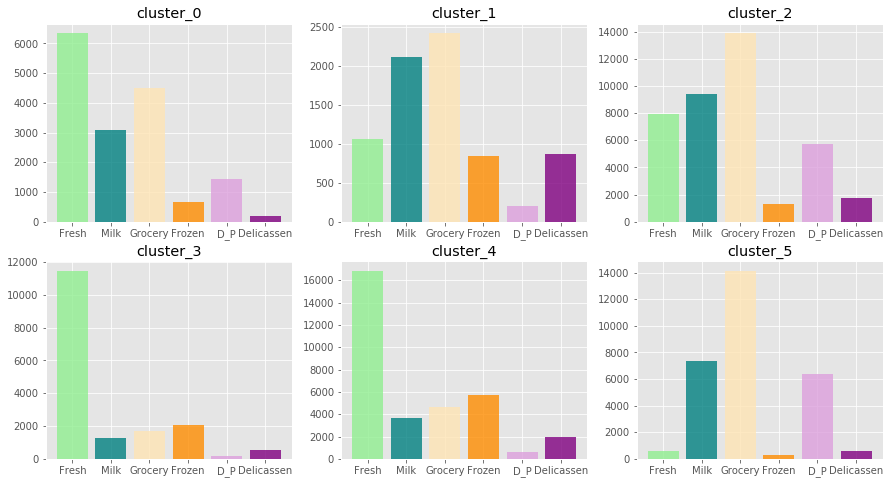

In [133]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
color=['lightgreen', 'teal', 'moccasin', 'darkorange', 'plum','purple']
langs = ['Fresh','Milk','Grocery','Frozen','D_P','Delicassen']
ax1.bar(langs,np.exp(cluster_0[categories].mean()),color=color,alpha=0.8);
ax2.bar(langs,np.exp(cluster_1[categories].mean()),color=color,alpha=0.8);
ax3.bar(langs,np.exp(cluster_2[categories].mean()),color=color,alpha=0.8);
ax4.bar(langs,np.exp(cluster_3[categories].mean()),color=color,alpha=0.8);
ax5.bar(langs,np.exp(cluster_4[categories].mean()),color=color,alpha=0.8);
ax6.bar(langs,np.exp(cluster_5[categories].mean()),color=color,alpha=0.8);
ax1.set_title('cluster_0')
ax2.set_title('cluster_1')
ax3.set_title('cluster_2')
ax4.set_title('cluster_3')
ax5.set_title('cluster_4')
ax6.set_title('cluster_5')
plt.show()

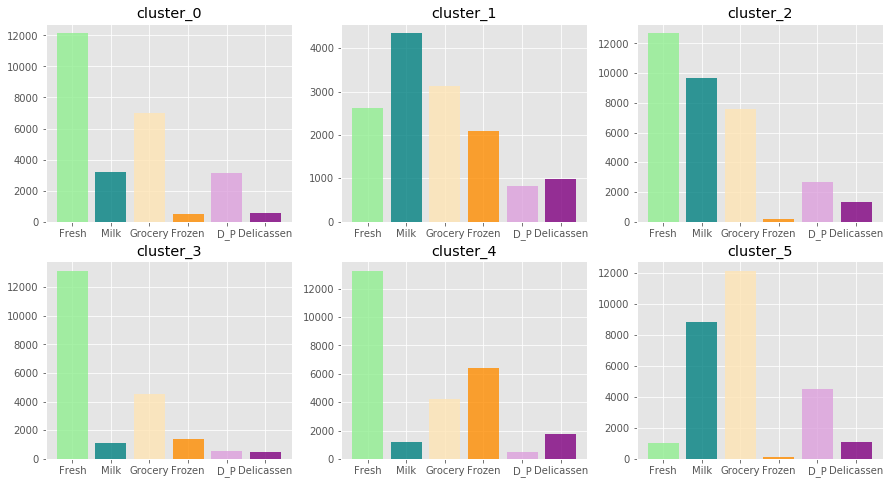

In [134]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
color=['lightgreen', 'teal', 'moccasin', 'darkorange', 'plum','purple']
langs = ['Fresh','Milk','Grocery','Frozen','D_P','Delicassen']
ax1.bar(langs,np.exp(cluster_0[categories].iloc[0]),color=color,alpha=0.8);
ax2.bar(langs,np.exp(cluster_1[categories].iloc[0]),color=color,alpha=0.8);
ax3.bar(langs,np.exp(cluster_2[categories].iloc[0]),color=color,alpha=0.8);
ax4.bar(langs,np.exp(cluster_3[categories].iloc[0]),color=color,alpha=0.8);
ax5.bar(langs,np.exp(cluster_4[categories].iloc[0]),color=color,alpha=0.8);
ax6.bar(langs,np.exp(cluster_5[categories].iloc[0]),color=color,alpha=0.8);
ax1.set_title('cluster_0')
ax2.set_title('cluster_1')
ax3.set_title('cluster_2')
ax4.set_title('cluster_3')
ax5.set_title('cluster_4')
ax6.set_title('cluster_5')
plt.show()